<center> <h1 style="background-color:Purple; color:white" >Mobile Games: Player Journey Analysis and A/B Testing</h1> 
</center>

## <font color='Purple'>Table of Contents </font> 

1. **[About the Project](#1)**  
    1. [Context](#1a)  
    2. [Objective](#1b)
2. **[About the Data](#2)**  
    1. [Missing values](#2a)  
    2. [Outliers](#2b)
3. **[Player Behavior Insight](#3)**  
    1. [Overall](#3a)
    2. [Gate 30 & 40 miletones](#3b)
4. **[1-day Retention Insight](#4)**
5. **[7-day Retention Insight](#5)**
6. **[Conclusion](#6)**

##  <font color='Purple'> Part 1. About The Project </font><a name= '1'></a>
### <font color='Purple'> A. Context </font>  <a name= '1a'></a>

Tactile Entertainment's Cookie Cats is a popular smartphone puzzle game. By linking the tiles of the same color, players could clear the board and complete the level. Players will have to accomplish each stage to advance to the next level. There are also singing cats featured in the game.

<table><tr>
<td> <img src="https://image.winudf.com/v2/image1/ZGsudGFjdGlsZS5jb29raWVjYXRzX3NjcmVlbl8wXzE1NzM1NzQ5OTNfMDE0/screen-0.jpg?fakeurl=1&type=.webp" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://www.dreamfab.com/wp-content/uploads/1-1.png" alt="Drawing" style="width: 330px;"/> </td>
</tr></table>

### <font color='Purple'>B. Objective </font>  <a name= '1b'></a>

As players accomplish certain stages, they will have to encounter gates that require them to wait sometime before continuing playing. If they want to play immediately, they must make an in-app purchase. 

We'll analyze the results of an A/B test in which Cookie Cats' first gate was relocated from level 30 to level 40. We'll look at how it affects player retention and player journey in particular.

<table><tr>
<td> <img src="https://mobimg.b-cdn.net/v2/fetch/71/71357cf6ed6d9775d4dccbce9812b12c.jpeg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/53/44/e5/5344e53d-e52f-220e-50ad-5c7a4a002555/pr_source.png/643x0w.jpg" alt="Drawing" style="width: 275px;"/> </td>
</tr></table>


##  <font color='Purple'> Part 2. About The Data </font><a name= '2'></a>
### <font color='Purple'> A. Missing values </font>  <a name= '2a'></a>

In [1]:
## libraries
%load_ext nb_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from pandasql import sqldf

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

- The dataset includes information about:  
    - **userid**: *unique id of players*
    - **version**: *When a player starts the game, he/she will be randomly put in the group whose first purchased gate in stage 30 or stage 40. The field version is used to state that*
    - **sum_gamerounds**: *the number of game rounds played by the player during the first week after installation*
    - **retention_1**: *return to play 1 day after installing*
    - **retention_7**: *return to play 7 days after installing*
- Data includes 90189 records with 5 attributes 
- There are **no missing values** in the dataset


In [2]:
df = pd.read_csv("D:/Jupyter Notebook/data/cookie_cats.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<IPython.core.display.Javascript object>

In [3]:
# Create a function to glimpse the data
def glimpse(df):
    print(f"{df.shape[0]} rows and {df.shape[1]} columns")
    display(df.head())
    df.describe()
    df.info()
    display(df.describe())

<IPython.core.display.Javascript object>

In [4]:
glimpse(df)

90189 rows and 5 columns


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


<IPython.core.display.Javascript object>

### <font color='Purple'> B. Outliers </font>  <a name= '2b'></a>

- If examine 2 groups of players separately, I can see that the number of rounds in gate 30 group players has some outliers. The max 'sum_gamerounds' is 49854, while its median is only 16. 

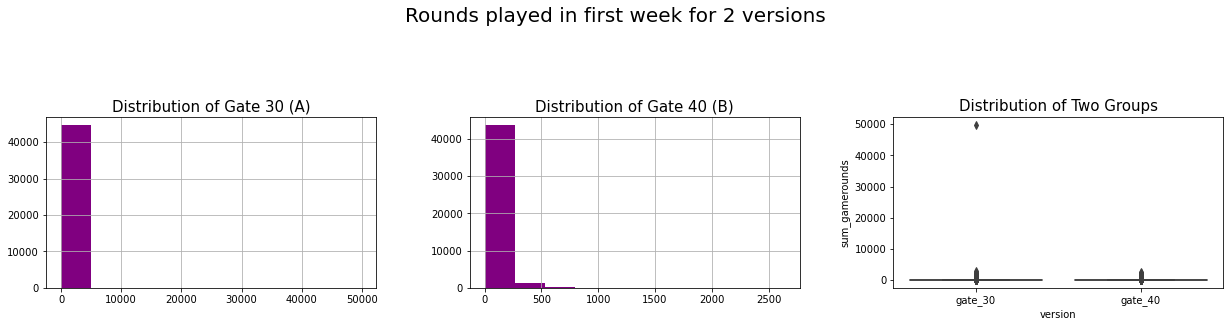

<IPython.core.display.Javascript object>

In [5]:
df1 = df.copy()

## Distribution/Histogram of rounds of games played by 2 groups in separte groups.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
df[(df.version == "gate_30")].hist("sum_gamerounds", ax=axes[0], color="purple")
df[(df.version == "gate_40")].hist("sum_gamerounds", ax=axes[1], color="purple")
sns.boxplot(x=df.version, y=df.sum_gamerounds, ax=axes[2])

plt.suptitle("Rounds played in first week for 2 versions", fontsize=20)
axes[0].set_title("Distribution of Gate 30 (A)", fontsize=15)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize=15)
axes[2].set_title("Distribution of Two Groups", fontsize=15)

plt.tight_layout(pad=4)

In [ ]:
sns.boxplot(x=df.version, y=df.sum_gamerounds, ax=axes[2])


Text(0.5, 0.98, 'Total rounds of each player (Before removing outliers)')

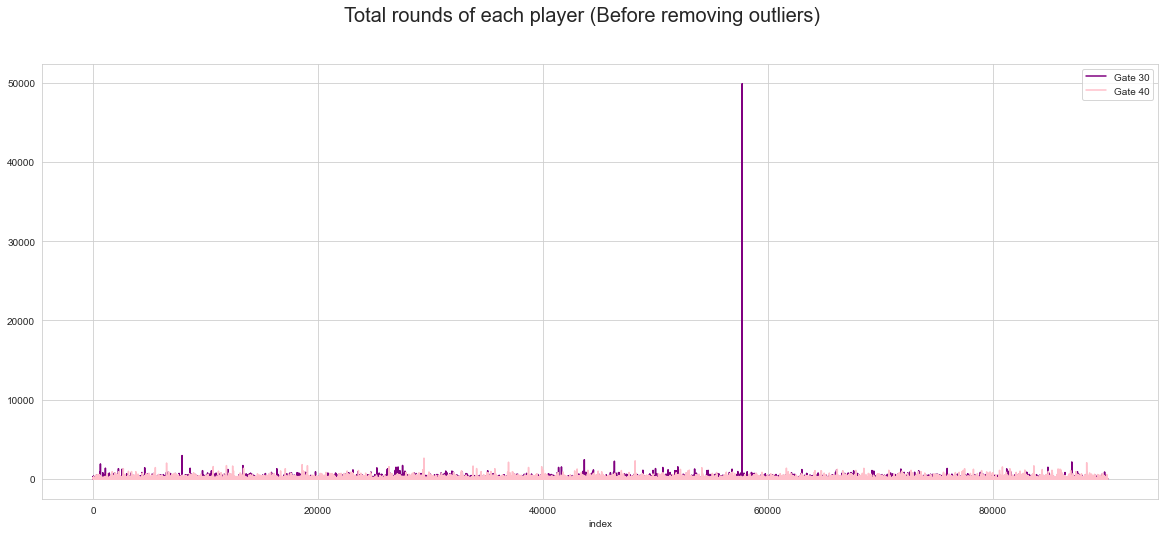

<IPython.core.display.Javascript object>

In [39]:
##Histogram of 2 groups in a plot with ou##tliers
df1[df1.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(
    legend=True, label="Gate 30", color="purple", figsize=(20, 8)
)
df1[df1.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(
    legend=True, label="Gate 40", color="pink"
)
plt.suptitle("Total rounds of each player (Before removing outliers)", fontsize=20)

In [7]:
## drop the outliers
df2 = df1.drop(
    df1[
        (df1.version == "gate_30") & (df1.sum_gamerounds == max(df1.sum_gamerounds))
    ].index
)

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Total rounds of each player (After removing outliers)')

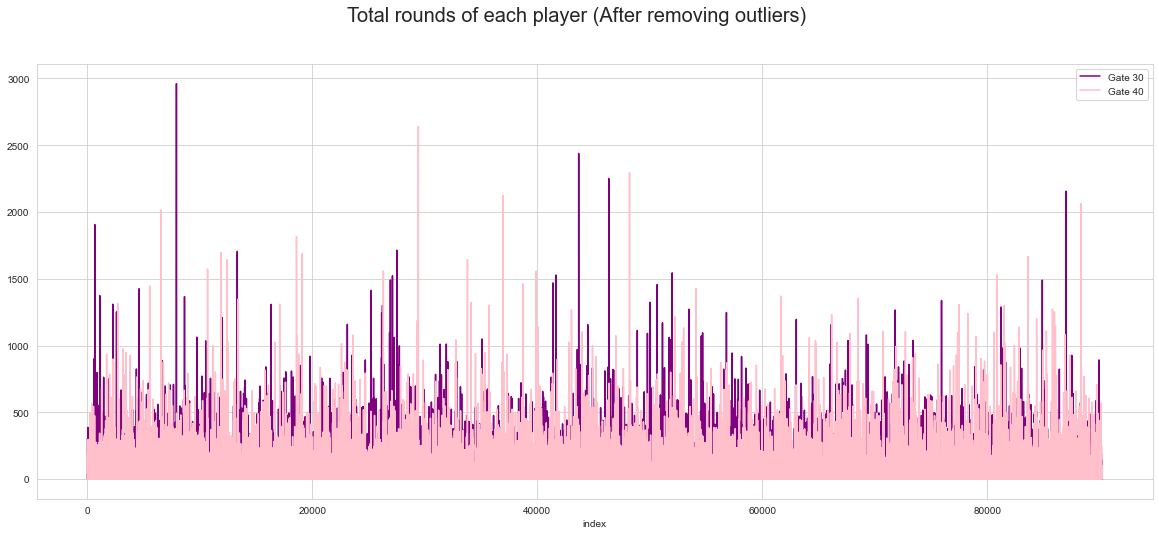

<IPython.core.display.Javascript object>

In [40]:
## Histogram after dropping the outliers
df2[df2.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(
    legend=True, label="Gate 30", color="purple", figsize=(20, 8)
)
df2[df2.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(
    legend=True, label="Gate 40", color="pink"
)
plt.suptitle("Total rounds of each player (After removing outliers)", fontsize=20)

Text(0.5, 1.0, "Distribution of both groups' total rounds (After removing outliers)")

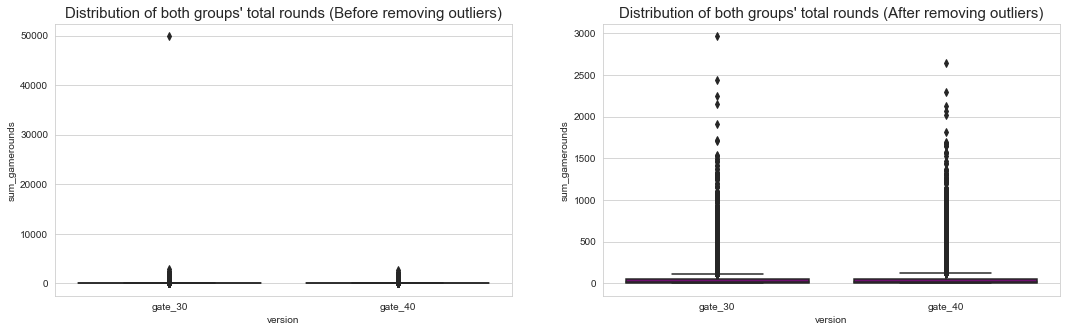

<IPython.core.display.Javascript object>

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.boxplot(x=df.version, y=df.sum_gamerounds, ax=axes[0], color="purple")

sns.boxplot(x=df2.version, y=df2.sum_gamerounds, ax=axes[1], color="purple")
axes[0].set_title(
    "Distribution of both groups' total rounds (Before removing outliers)", fontsize=15
)
axes[1].set_title(
    "Distribution of both groups' total rounds (After removing outliers)", fontsize=15
)

## <font color='Purple'> Part 3. Player Behavior Insight </font>  <a name= '3'></a>  
### <font color='Purple'>A. Overall </font>  <a name= '3a'></a>  

In [9]:
df2.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0,51.320253,102.682719,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,2961.0


<IPython.core.display.Javascript object>

In [10]:
total_play = []
rounds = [0, 1, 2]
for i in rounds:
    play_ = (len(df2[df2.sum_gamerounds == i]) / len(df2)) * 100
    play_string = print("% play ", i, " round(s): ", play_)
    total_play.append(play_string)


% play  0  round(s):  4.428527076772963
% play  1  round(s):  6.1405064975384755
% play  2  round(s):  5.107109593294008


<IPython.core.display.Javascript object>

After installing, in the first week:  
- **~5%** played more than 200 rounds. We can confirm that these players really enjoy the game.
- **~4.4%** just installed the game and did **not play any rounds**. Reasons might be:  
    - They downloaded many games at the same time, and they were more interested in other ones more. 
    - They opened the games but the design or music did not meet their expectations. So, they quit before starting the games (If we have the data about game delete after installing, we can confirm this assumption)
    - They downloaded and did not have time to start it yet, saved it for spare time. 
- **~15%** played **fewer than 3 rounds in 1 week** after installation. Reasons might be: 
    - Players tried the games but they did not interested. So they rarely played the games or they can drop after. (Looking at the data after 7 days, if they did not return, it means they churned and the game was not their interest)  
    - Players tried some rounds at a time to entertain (Looking at the data after 7 days, if they returned, it means that our assumption might be correct)
    - The game might too easy so they got bored easily
<br>

**Overall, as 4.4% players did not played the games and about 15% players rarely played the game in the first week after installation, company should conduct research on question why did players drop or not engage in the games at the early stage. In-app survey question can be a good option to consider to collect feedback.**




In [11]:
## How many players for each total round?

df3 = (
    df2.groupby("sum_gamerounds")
    .agg({"userid": "nunique"})
    .rename({"sum_gamerounds": "Total_Rounds", "userid": "Total_Players"}, axis=1)
    .reset_index()
)

df3

,sum_gamerounds,Total_Players
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
...,...,...
936,2251,1
937,2294,1
938,2438,1
939,2640,1


<IPython.core.display.Javascript object>

In [12]:
query = """
SELECT *,  previous_round - Total_Players as decrease_gap from 
(SELECT *, 
       LAG(Total_Players, 1) OVER(
       ORDER BY sum_gamerounds, Total_Players ASC) AS previous_round
FROM df3)
where sum_gamerounds > 1"""

<IPython.core.display.Javascript object>

In [13]:
## How many players decrease after each round?
gap = sqldf(query)

## % decrease compared to last round
gap["% decrease"] = ((gap["decrease_gap"] / gap["previous_round"]) * 100).round(2)

<IPython.core.display.Javascript object>

In [14]:
## % user remaining compared to the first round
gap["% remaining"] = ((gap["Total_Players"] / 5538) * 100).round(2)
gap

,sum_gamerounds,Total_Players,previous_round,decrease_gap,% decrease,% remaining
0,2,4606,5538,932,16.83,83.17
1,3,3958,4606,648,14.07,71.47
2,4,3629,3958,329,8.31,65.53
3,5,2992,3629,637,17.55,54.03
4,6,2861,2992,131,4.38,51.66
...,...,...,...,...,...,...
934,2251,1,1,0,0.00,0.02
935,2294,1,1,0,0.00,0.02
936,2438,1,1,0,0.00,0.02
937,2640,1,1,0,0.00,0.02


<IPython.core.display.Javascript object>

In [15]:
## Top 20 decrease
gap_20 = gap.sort_values("decrease_gap", ascending=False).head(20)

<IPython.core.display.Javascript object>

In [16]:
gap_20

,sum_gamerounds,Total_Players,previous_round,decrease_gap,% decrease,% remaining
0,2,4606,5538,932,16.83,83.17
1,3,3958,4606,648,14.07,71.47
3,5,2992,3629,637,17.55,54.03
5,7,2379,2861,482,16.85,42.96
2,4,3629,3958,329,8.31,65.53
8,10,1752,2013,261,12.97,31.64
7,9,2013,2267,254,11.20,36.35
4,6,2861,2992,131,4.38,51.66
18,20,1033,1158,125,10.79,18.65
6,8,2267,2379,112,4.71,40.94


<IPython.core.display.Javascript object>

In [17]:
gap[gap["% remaining"] < 1]

,sum_gamerounds,Total_Players,previous_round,decrease_gap,% decrease,% remaining
152,154,54,60,6,10.00,0.98
154,156,45,72,27,37.50,0.81
163,165,54,59,5,8.47,0.98
164,166,54,54,0,0.00,0.98
166,168,53,60,7,11.67,0.96
...,...,...,...,...,...,...
934,2251,1,1,0,0.00,0.02
935,2294,1,1,0,0.00,0.02
936,2438,1,1,0,0.00,0.02
937,2640,1,1,0,0.00,0.02


<IPython.core.display.Javascript object>

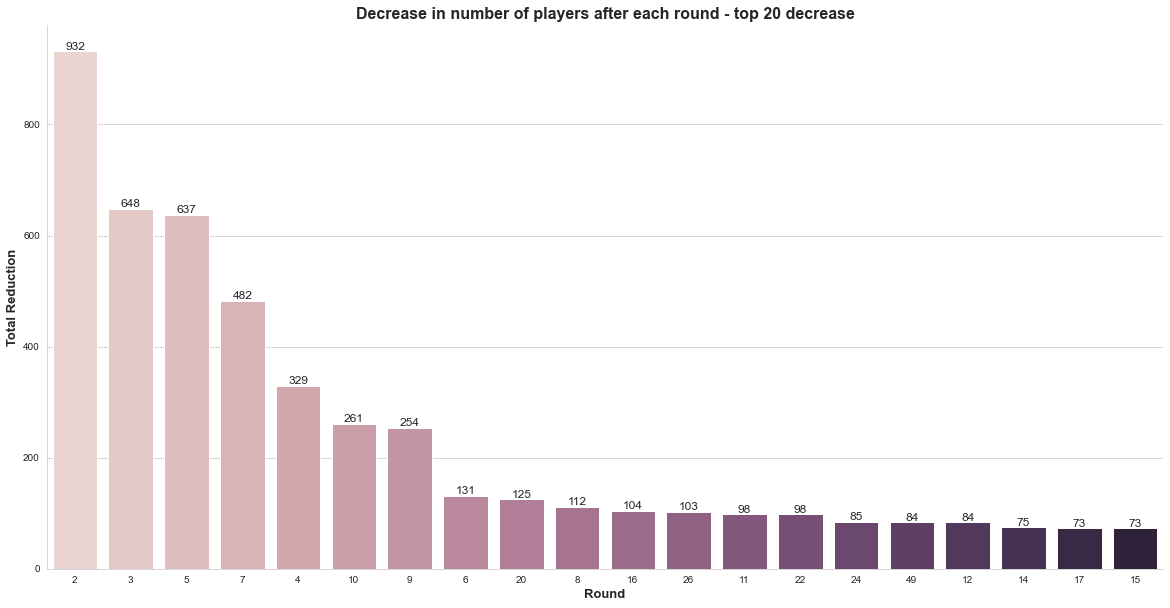

<IPython.core.display.Javascript object>

In [49]:
# Vertical Barchart
# Create subplot
sns.set_style("whitegrid")  # set theme
fig, axes = plt.subplots(figsize=(20, 10))
# Create barplot
chart = sns.barplot(
    color="purple",
    x=gap_20.sum_gamerounds,
    y=gap_20["decrease_gap"],
    palette=sns.cubehelix_palette(len(gap_20)),
    order=gap_20.sum_gamerounds.values,
)
# Customize chart
chart.set_ylabel("Total Reduction", weight="bold", fontsize=13)
chart.set_xlabel("Round", weight="bold", fontsize=13)
chart.set_title(
    "Decrease in number of players after each round - top 20 decrease",
    weight="bold",
    fontsize=16,
)
sns.despine()
# Value number on chart
for p in axes.patches:
    height = p.get_height()
    axes.text(
        p.get_x() + p.get_width() / 2.0,
        height + 3,
        "{:1.0f}".format(height),
        ha="center",
        fontsize=12,
    )

Text(0.5, 1.0, 'Number of players who play each rounds')

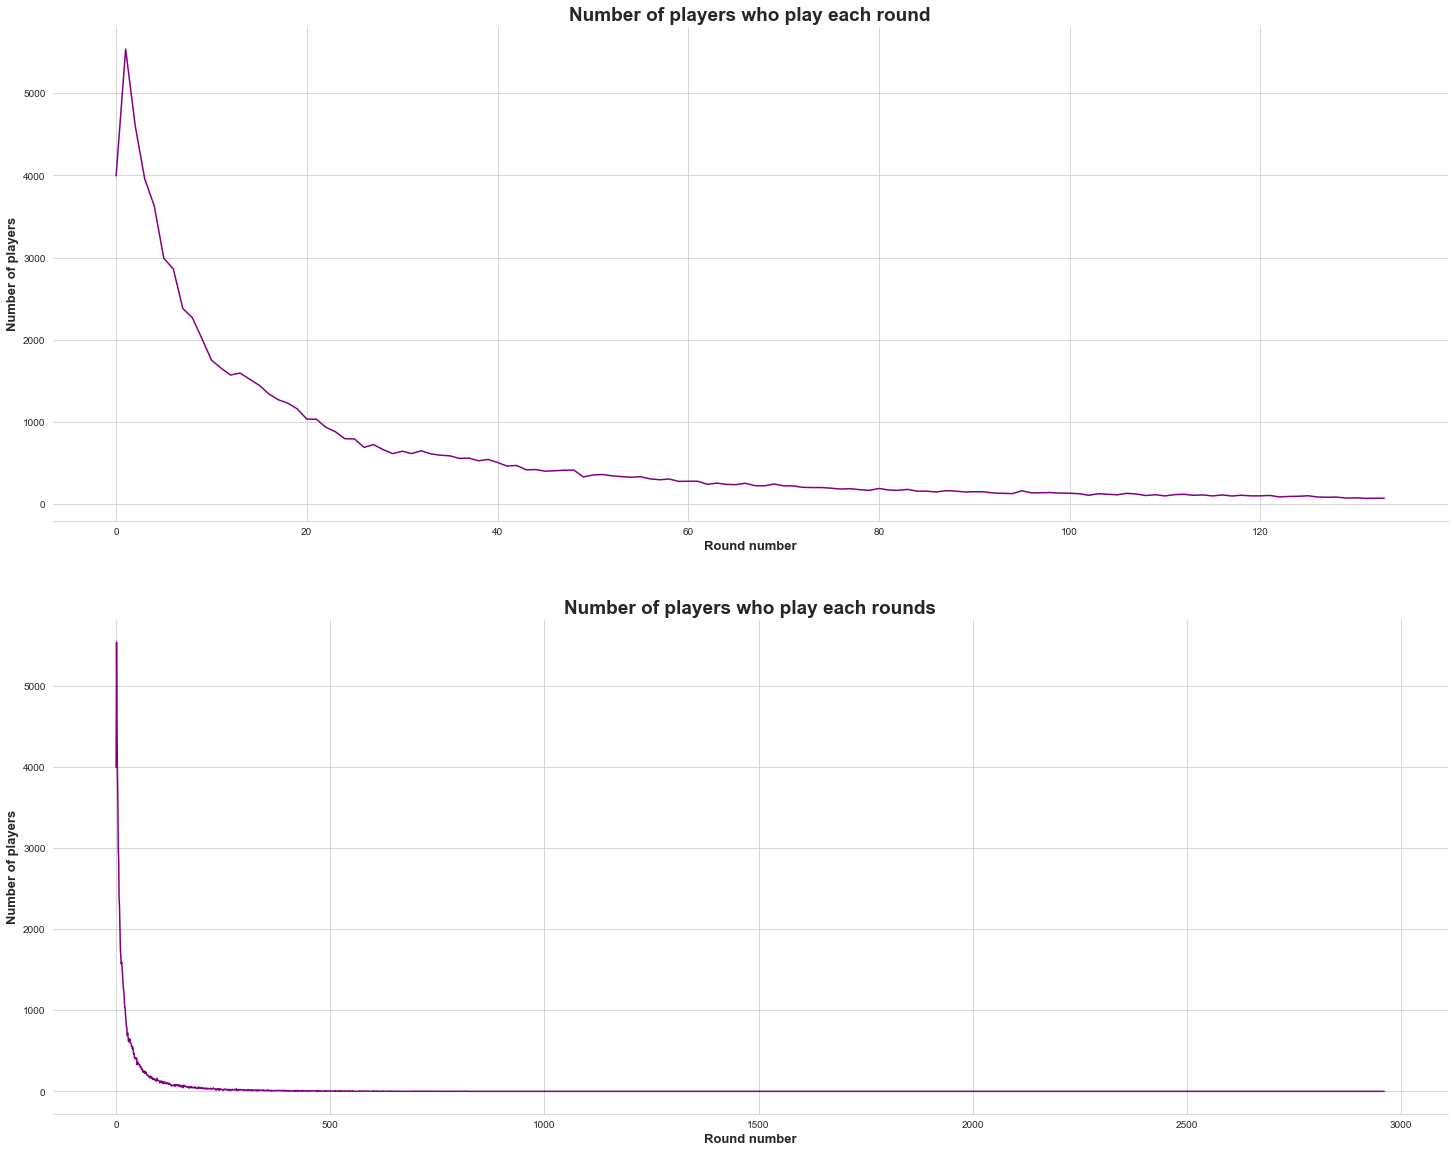

<IPython.core.display.Javascript object>

In [50]:
df4 = df3[df3.sum_gamerounds < 134]

# Create subplot
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 20), sharey=False)  # Create lineplot
chart = sns.lineplot(ax=axes[0], x=df4.sum_gamerounds, y=df4.Total_Players, color="purple")
sns.despine(left=True)

# Customize chart
chart.set_xlabel("Round number", weight="bold", fontsize=13)
chart.set_ylabel("Number of players", weight="bold", fontsize=13)
chart.set_title("Number of players who play each round", weight="bold", fontsize=19)

# Create lineplot
chart = sns.lineplot(ax=axes[1], x=df3.sum_gamerounds, y=df3.Total_Players, color="purple")
sns.despine(left=True)
# Customize chart
chart.set_xlabel("Round number", weight="bold", fontsize=13)
chart.set_ylabel("Number of players", weight="bold", fontsize=13)
chart.set_title("Number of players who play each rounds", weight="bold", fontsize=19)


- Looking at the above graph, it can be observed that players were reduced after each round. Especially, the significant decrease happened between the first round and second round with 932 players (~16.83% players) stopped after the first round. 
- The reduction from the 1st round to 20th round was even more significant, and then the reduction started to flatten. 
- Therefore, it can be said that the players often drop the game in the early stage from round 1 to round 20. After round 20, player reduction in each round seemed to get smaller. It means that players who stayed after round 20 must truly interest in the game. However, after round 154, the players lost interest in the game as the percentage of players remaining were under 1%

### <font color='Purple'> B. Gate 30 & 40 milestones </font>  <a name= '3b'></a>  

In [20]:
# How many users reached gate 30 & gate 40 levels?
df_version = (
    df1.groupby(["version", "sum_gamerounds"])
    .agg({"userid": "nunique"})
    .rename({"sum_gamerounds": "Total_Rounds", "userid": "Total_Players"}, axis=1)
    .reset_index()
)
df_reachgate = df_version.loc[df_version.sum_gamerounds.isin([1, 30, 40, 29, 39])]

## %reach gate 30&40 compared to level 1
df_reachgate["%remaining"] = np.where(
    df_reachgate["version"] == "gate_30",
    ((df_reachgate["Total_Players"] / 2749) * 100).round(3),
    ((df_reachgate["Total_Players"] / 2789) * 100).round(3),
)

<IPython.core.display.Javascript object>

In [21]:
df_reachgate

,version,sum_gamerounds,Total_Players,%remaining
1,gate_30,1,2749,100.000
29,gate_30,29,302,10.986
30,gate_30,30,298,10.840
39,gate_30,39,300,10.913
40,gate_30,40,278,10.113
780,gate_40,1,2789,100.000
808,gate_40,29,311,11.151
809,gate_40,30,344,12.334
818,gate_40,39,242,8.677
819,gate_40,40,227,8.139


<IPython.core.display.Javascript object>

**Looking if users coming back after 7 days after reaching stage 30,40**

In [22]:
df2.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<IPython.core.display.Javascript object>

In [23]:
df_30gate = df2[(df2.version == "gate_30") & (df2.sum_gamerounds == 29)]
df_40gate = df2[(df2.version == "gate_40") & (df2.sum_gamerounds == 39)]

<IPython.core.display.Javascript object>

In [24]:
#%users coming back in version 30_gate after finishing stage 29
df_30gate["retention_7"].sum() / df_30gate["retention_7"].count()

0.17218543046357615

<IPython.core.display.Javascript object>

In [25]:
#%users coming back in version 30_gate after finishing stage 39
df_40gate["retention_7"].sum() / df_40gate["retention_7"].count()

0.2024793388429752

<IPython.core.display.Javascript object>

- There were only 10.8% of users of version gate_30 remaining until gate 30, and 1% of players of round 29 did not continue to gate 30 in 1 week. After 7 days, about 17% of users in round 29 return to the game (based on the retention rate).  
- There were 8% of users of version gate_40 remaining until gate 40, and 6% of players of round 39 did not continue to gate 40 within 1 week. After 7 days, 20% of users in round 39 came back. 
- Meanwhile, the number of players reaching gates 30 of gate_40 version was greater than version gate_30, with 12% remaining players. <br> 
- At first glance, the total players reaching level 30 in version gate_40 was higher than in version gate_30's. However, after that, % the users remaining until gate 40 reduced by 4% to only ~8%, which was 2% lower than the same gate level of version gate_30. <br> 
***So, it can be assumed that more players come to stage 30 and continue to go on in version gate_40 than in version gate_30 (because users do not have to wait or make in-app purchases in gate 30 of version gate_40). <br>
According to 1-week data, 1% of players of round 29 did not continue to gate 30, and 6% of players of round 39 did not continue to gate 40. It can be understood that users in version gate_30 seem to still remain interested in the game when coming to level 30, so they played the game immediately after waiting time or made the in-app purchase to continue. In contrast, players in the gate_40 version would take a break and continue after (The number of 20% players returns after 7 days might be a piece of evidence for this statement). In other words, people passing stage 40 in the gate_40 version seem to have more commitment to the game**

## <font color='Purple'> Part 4. 1-day Retention Insight </font>  <a name= '4'></a>

- There is a slight difference between retention rate after 1 day of version gate_30 and gate_40. There were more 0.6% of users  remaining in version gate_40. But this percentage is too small to tell anything about the impact of moving from gate_30 to gate_40.  
- Besides, that players did not return after playing for one day doesn't really tell anything about the impact of moving gate from 30 to 40. It's a high chance that most of them did not reach stage 30 on the first day of playing.    

In [26]:
# Calculate %retention1 rate in each version
df2_reten1 = (
    df2.groupby(["version", "retention_1"])
    .agg({"userid": "count"})
    .rename(columns={"userid": "Total_Users"})
    .reset_index()
)
df2_reten1

,version,retention_1,Total_Users
0,gate_30,False,24665
1,gate_30,True,20034
2,gate_40,False,25370
3,gate_40,True,20119


<IPython.core.display.Javascript object>

In [27]:
pivot = np.round(
    pd.pivot_table(
        df2_reten1,
        values="Total_Users",
        index=["version"],
        columns=["retention_1"],
        aggfunc=[np.sum],
        margins=True,
        fill_value=0,
    ),
    2,
)
pivot

sum              
retention_1  False   True    All
version                         
gate_30      24665  20034  44699
gate_40      25370  20119  45489
All          50035  40153  90188

<IPython.core.display.Javascript object>

In [28]:
df2_reten1["%retention_1"] = np.where(
    df2_reten1["version"] == "gate_30",
    (df2_reten1.Total_Users / 44699 * 100).round(3),
    (df2_reten1.Total_Users / 45489 * 100).round(3),
)

<IPython.core.display.Javascript object>

In [29]:
df2_reten1

,version,retention_1,Total_Users,%retention_1
0,gate_30,False,24665,55.180
1,gate_30,True,20034,44.820
2,gate_40,False,25370,55.772
3,gate_40,True,20119,44.228


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='version'>

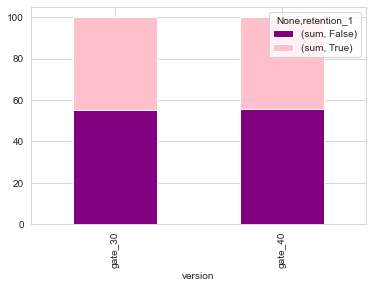

<IPython.core.display.Javascript object>

In [30]:
pivot2 = np.round(
    pd.pivot_table(
        df2_reten1,
        values="%retention_1",
        index=["version"],
        columns=["retention_1"],
        aggfunc=[np.sum],
        fill_value=0,
    ),
    2,
)
pivot2

pivot2.plot(kind="bar", stacked="True", color=["purple", "pink"])

## <font color='Purple'> Part 5. 7-day Retention Insight </font>  <a name= '5'></a>

In [31]:
# Calculate %retention1 rate in each version
df2_reten7 = (
    df2.groupby(["version", "retention_7"])
    .agg({"userid": "count"})
    .rename(columns={"userid": "Total_Users"})
    .reset_index()
)
df2_reten7

,version,retention_7,Total_Users
0,gate_30,False,36198
1,gate_30,True,8501
2,gate_40,False,37210
3,gate_40,True,8279


<IPython.core.display.Javascript object>

In [32]:
pivot_7 = np.round(
    pd.pivot_table(
        df2_reten7,
        values="Total_Users",
        index=["version"],
        columns=["retention_7"],
        aggfunc=[np.sum],
        margins=True,
        fill_value=0,
    ),
    2,
)
pivot_7

sum              
retention_7  False   True    All
version                         
gate_30      36198   8501  44699
gate_40      37210   8279  45489
All          73408  16780  90188

<IPython.core.display.Javascript object>

In [33]:
df2_reten7["%retention_7"] = np.where(
    df2_reten1["version"] == "gate_30",
    (df2_reten7.Total_Users / 44699 * 100).round(3),
    (df2_reten7.Total_Users / 45489 * 100).round(3),
)

<IPython.core.display.Javascript object>

In [34]:
df2_reten7

,version,retention_7,Total_Users,%retention_7
0,gate_30,False,36198,80.982
1,gate_30,True,8501,19.018
2,gate_40,False,37210,81.800
3,gate_40,True,8279,18.200


<IPython.core.display.Javascript object>

- Looking at the table above, it can be seen that user retention after 7 days in version gate_30 is 1% higher than user retention in gate_40 version.  
- To see this pattern clearer, I will apply bootstrap analysis to figure out how certain we should be of the difference between the AB-groups. 
- After doing the bootstrap to resample 519 times, we have 99% probability that **7-day retention is greater when the gate is at level 30** 


In [35]:
# Creating a list with bootstrapped means for each AB-group
bootstrap_7 = []
for i in range(519):
    mean_retention_percent = (
        df2.sample(frac=1, replace=True).groupby("version")["retention_7"].mean()
    )
    bootstrap_7.append(mean_retention_percent)

bootstrap_7 = pd.DataFrame(bootstrap_7)
bootstrap_7["difference"] = bootstrap_7["gate_30"] - bootstrap_7["gate_40"]

<IPython.core.display.Javascript object>

Probability that 7-day retention is greater when the gate is at level 30: 0.9961464354527938


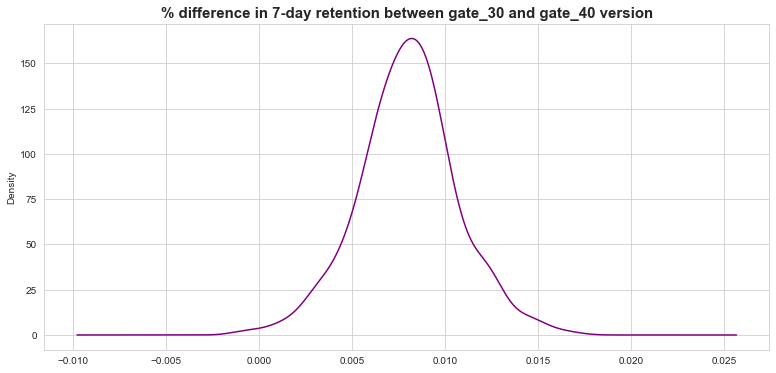

<IPython.core.display.Javascript object>

In [51]:
# Ploting the bootstrap % difference
fig, ax = plt.subplots(figsize=(13, 6))
ax = bootstrap_7["difference"].plot(kind="density", color="purple")
ax.set_title(
    "% difference in 7-day retention between gate_30 and gate_40 version",
    fontsize=15,
    weight="bold",
)

# The probability that 7-day retention is greater when the gate is at level 30
print(
    "Probability that 7-day retention is greater when the gate is at level 30:",
    (bootstrap_7["difference"] > 0).mean(),
)

##  <font color='Purple'> Part 6. Conclusion </font><a name= '6'></a>


- Users in version gate_30 seem to still remain interested in the game when coming to level 30, so they played the game immediately after waiting time or made the in-app purchase to continue. After 1 week, retention % of these users was not as high as version_40. In contrast, players in the gate_40 when coming to stage 40 would take a break and continue after (The number of 20% players returns after 7 days might be a piece of evidence for this statement). In other words, people passing stage 40 in the gate_40 version seem to have more commitment to the game

- However, overall 7-day retention is greater when the gate is at level 30. Besides, as the game reached higher level, people seem to gradually lost interest in the game. Therefore, requiring players to take a break when they reach a gate will make their enjoyment of the game prolonged.

- We should not move the limitation from gate 30 to gate 40. 